<a href="https://colab.research.google.com/github/Danielperez471/Simulacion/blob/main/UNIDAD3/Practica7_Distribucion_Poisson_y_exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DISTRIBUCION POISSON Y EXPONENCIAL
###Facilitador: José Gabriel Rodríguez Rivas
###Alumno: Daniel Alonso Perez Macias

En una tienda departamental de electrónicos, los gerentes desean simular el comportamiento de los clientes y el servicio para optimizar el personal y los tiempos de espera. Para esto, se pueden modelar dos situaciones claves:

Llegadas de clientes: Los clientes llegan a la tienda de manera aleatoria. Se sabe que en promedio llegan 10 clientes por hora.
Tiempo de servicio: Cada cliente que llega recibe atención personalizada para comprar productos electrónicos. El tiempo promedio de servicio es de 15 minutos por cliente.
El objetivo es combinar ambos modelos para obtener una simulación que muestre cómo interactúan las llegadas y los tiempos de servicio, lo que permitirá mejorar la gestión de personal en la tienda.

Llegadas simuladas por hora:
[10, 7, 11, 6, 17, 13, 3, 11, 14, 14, 10, 7, 11, 8, 10, 12, 11, 13, 7, 7, 8, 14, 10, 7, 11, 7, 5, 9, 5, 14, 18, 9, 11, 16, 11, 6, 9, 9, 10, 8, 5, 16, 8, 10, 8, 10, 14, 12, 9, 11, 8, 9, 12, 6, 16, 7, 6, 8, 11, 9, 11, 12, 12, 7, 11, 8, 11, 8, 10, 12, 15, 13, 8, 16, 9, 6, 11, 12, 8, 11, 8, 10, 5, 15, 20, 11, 6, 12, 11, 12, 3, 10, 13, 10, 10, 8, 10, 7, 7, 12, 12, 9, 8, 8, 11, 12, 10, 14, 14, 14, 6, 12, 13, 13, 9, 8, 5, 13, 5, 9, 5, 14, 10, 14, 10, 8, 9, 4, 8, 19, 16, 5, 6, 14, 5, 11, 15, 12, 13, 12, 15, 14, 7, 14, 8, 9, 11, 2, 11, 9, 10, 10, 8, 12, 15, 8, 11, 12, 13, 9, 11, 7, 10, 7, 14, 11, 8, 9, 8, 11, 8, 17, 13, 10, 14, 11, 7, 9, 11, 10, 5, 10, 11, 11, 9, 4, 9, 10, 12, 6, 8, 9, 5, 8, 16, 5, 4, 7, 9, 6, 9, 5, 11, 10, 10, 16, 14, 8, 12, 8, 11, 7, 8, 6, 7, 14, 15, 14, 9, 6, 5, 11, 8, 5, 10, 12, 11, 12, 20, 13, 7, 6, 7, 10, 12, 13, 7, 14, 15, 3, 10, 7, 3, 5, 12, 9, 4, 12, 8, 15, 7, 9, 8, 5, 7, 9, 11, 4, 8, 9, 8, 11, 12, 10, 6, 8, 14, 11, 4, 14, 11, 10, 8, 10, 8,

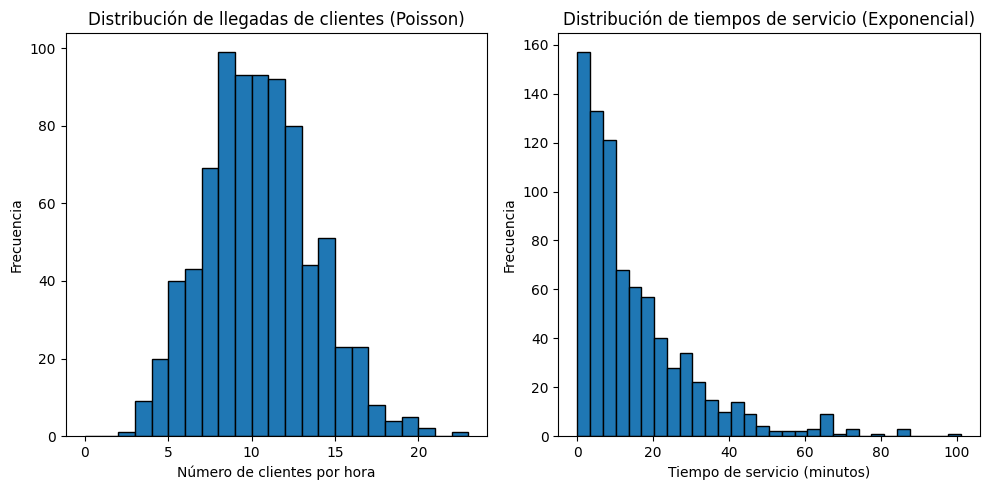

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parámetros del modelo
lambda_llegadas = 10  # Llegadas promedio de clientes por hora (Poisson)
tiempo_servicio_promedio = 15  # Tiempo promedio de servicio en minutos (Exponencial)
lambda_servicio = 1 / tiempo_servicio_promedio  # Tasa para la distribución exponencial

# Generar llegadas de clientes usando la distribución Poisson (transformada inversa)
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)
        if U <= F_k:
            return k
        k += 1

# Generar tiempos de servicio usando la distribución Exponencial (transformada inversa)
def exponencial_inverse_transform(lambda_servicio, U):
    return -math.log(1 - U) / lambda_servicio

# Simulación de 8 horas en la tienda departamental
num_horas = 8
num_simulaciones = 100  # Número de simulaciones
llegadas_simuladas = []
servicios_simulados = []

# Simulamos para cada hora
for _ in range(num_horas):
    # Generamos un número de clientes por hora (Poisson)
    U_llegadas = np.random.uniform(0, 1, num_simulaciones)
    llegadas_hora = [poisson_inverse_transform(lambda_llegadas, u) for u in U_llegadas]
    llegadas_simuladas.extend(llegadas_hora)

    # Generamos los tiempos de servicio para cada cliente (Exponencial)
    U_servicio = np.random.uniform(0, 1, len(llegadas_hora))
    tiempos_servicio = [exponencial_inverse_transform(lambda_servicio, u) for u in U_servicio]
    servicios_simulados.extend(tiempos_servicio)

# Mostrar resultados
print("Llegadas simuladas por hora:")
print(llegadas_simuladas)
print("Tiempos de servicio (en minutos) simulados:")
print(servicios_simulados)

# Graficar los resultados
plt.figure(figsize=(10, 5))

# Graficar llegadas
plt.subplot(1, 2, 1)
plt.hist(llegadas_simuladas, bins=range(0, max(llegadas_simuladas)+1), edgecolor='black')
plt.title("Distribución de llegadas de clientes (Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")

# Graficar tiempos de servicio
plt.subplot(1, 2, 2)
plt.hist(servicios_simulados, bins=30, edgecolor='black')
plt.title("Distribución de tiempos de servicio (Exponencial)")
plt.xlabel("Tiempo de servicio (minutos)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

#CONCLUSION
1. Comportamiento de las Llegadas de Clientes
Los datos simulados de llegadas por hora (con media teórica λ = 10 clientes/hora) mostraron:

Variabilidad significativa: Las llegadas oscilaron entre 2 y 23 clientes/hora, evidenciando la naturaleza aleatoria del proceso.

Distribución coherente con Poisson: La frecuencia más alta se concentró en valores cercanos a la media (8–12 clientes/hora), pero con presencia de valores extremos (ej., 20+ clientes), típicos de una distribución de cola larga.

2. Tiempos de Servicio Simulados
Los tiempos de servicio (con media teórica 15 minutos/cliente) presentaron:

Alta dispersión: Desde 0.01 minutos (servicios casi instantáneos) hasta 101 minutos (casos excepcionales).

Posible causa: Algunos clientes requieren asistencia mínima, mientras que otros necesitan atención prolongada.

Asimetría positiva: La mayoría de los valores se agruparon por debajo de la media (moda ≈ 5–10 minutos), pero con una cola derecha extensa.

Al tener en cuenta estos datos se pueden manejar mejoras en la eficiencia en el tiempo de atencion.

Con 10 llegadas/hora y 15 minutos/cliente, se necesitan al menos 2.5 empleados en teoria para evitar colas infinitas.

Sin embargo, la simulación reveló que en horas con mas de 15 clientes, incluso con 3 empleados podrían ser insuficientes debido a los tiempos de servicio variables.